In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.test_model, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/*-anoms.nc
Files for CMCC-CM2-SR5: ['/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r4i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r5i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r6i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_CMCC-CM2-SR5_psl_north-atlantic_2-9_DJFM-r3i1-anoms.nc', '/home/users/benhutch/skill-maps-processed-data/psl/CMCC-CM2-SR5/north-atlantic/years_2-9/DJFM/outputs/merge

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data:  <xarray.DataArray 'psl' (time: 60, lat: 24, lon: 48)>
dask.array<open_dataset-d1a297672907711a656eb128e6ee45f5psl, shape=(60, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-07-31 18:00:00 ... 2024-07-31 18:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    comment:        Sea Level Pressure
    original_name:  PSL
    cell_measures:  area: areacella
Variable data type:  <class 'xarray.core.dataarray.DataArray'>
Variable data dimensions:  3
Variable data values:  [[[-1.96171875e+01 -2.60546875e+01 -3.31640625e+01 ... -1.18828125e+01
   -8.20312500e+00 -2.32031250e+00]
  [-1.88046875e+01 -2.80703

In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

Observations dataset: <xarray.Dataset>
Dimensions:  (time: 252, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
Data variables:
    var151   (time, lat, lon) float32 dask.array<chunksize=(50, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Wed May 24 13:57:07 2023: cdo -f nc copy /home/users/benhut...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
Checking for NaN values in observations dataset
Regridded observations dataset: <xarray.Dataset>
Dimensions:  (time: 252, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2

/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


[[[-1.39601562e+02 -1.45367188e+02 -1.47273438e+02 ... -1.71242188e+02
   -1.59765625e+02 -1.46804688e+02]
  [-2.21445312e+02 -2.14054688e+02 -2.02976562e+02 ... -2.15382812e+02
   -2.28804688e+02 -2.26890625e+02]
  [-2.29375000e+02 -2.20507812e+02 -2.11375000e+02 ... -2.50046875e+02
   -2.49914062e+02 -2.40601562e+02]
  ...
  [ 1.14382812e+02  1.03734375e+02  8.97421875e+01 ...  1.19546875e+02
    1.29226562e+02  1.24382812e+02]
  [ 9.76718750e+01  8.68203125e+01  6.51718750e+01 ...  1.07406250e+02
    1.14796875e+02  1.10398438e+02]
  [ 8.94843750e+01  6.91093750e+01  8.20312500e+01 ...  1.01531250e+02
    1.05507812e+02  1.02867188e+02]]

 [[ 4.81210938e+02  4.44726562e+02  4.03414062e+02 ...  5.35570312e+02
    5.31265625e+02  5.07382812e+02]
  [ 4.33273438e+02  4.01570312e+02  3.65960938e+02 ...  5.21835938e+02
    4.99414062e+02  4.68515625e+02]
  [ 4.14250000e+02  3.73398438e+02  3.28500000e+02 ...  5.03921875e+02
    4.75929688e+02  4.45960938e+02]
  ...
  [ 3.66406250e+00  9.9

In [8]:
# # check the values of obs
# obs["var151"].values

In [9]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

In [10]:
# # Attempt to plot the data
# fnc.plot_obs_data(obs)

In [11]:
# print(variable_data["CMCC-CM2-SR5"])

In [12]:
# fnc.plot_model_data(variable_data, dic.test_model, dic.gif_plots_dir)

In [13]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.test_model, region, forecast_range, season, variable)

ensemble mean shape (60, 24, 48)
ensemble mean type <class 'xarray.core.dataarray.DataArray'>
observed data shape Frozen({'time': 63, 'lon': 48, 'lat': 24})
observed data type <class 'xarray.core.dataset.Dataset'>
observed data values [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan na

pfield mod [[0.00966898 0.00525063 0.00230546 ...        nan        nan        nan]
 [       nan 0.00649064 0.00277509 ...        nan        nan        nan]
 [       nan        nan 0.00616978 ...        nan        nan        nan]
 ...
 [0.001661   0.00148965 0.00045798 ...        nan        nan        nan]
 [0.0032972  0.00184201 0.00053408 ...        nan        nan        nan]
 [0.00747915 0.00204772 0.00314626 ...        nan        nan        nan]]


/opt/jaspy/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/jaspy/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


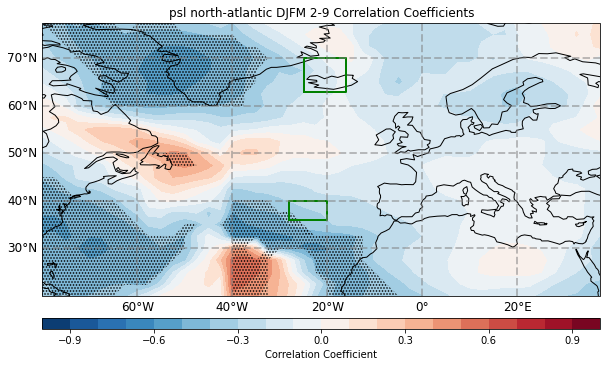

In [14]:
# Call the function to plot the spatial correlations of these
fnc.plot_correlations(rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)